In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\dkdes\OneDrive\Desktop\kaggle_datasets\Amazon Sale Report.csv")
df.head()

C:\Users\dkdes\AppData\Local\Temp\ipykernel_37640\111977491.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\dkdes\OneDrive\Desktop\kaggle_datasets\Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [4]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [5]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

## Columns To drop
1.index
2.Order ID
3.Sales Channel
4.Style
5.SKU
6.ASIN
7.Currency
8.ship-postal-code
9.promotion-ids
10.Unnamed: 22
11.Ship-country
12.fulfilled-by

In [6]:
df=df.drop(["index","Order ID","Sales Channel ","Style","SKU","ASIN","currency","ship-postal-code","ship-country","promotion-ids","Unnamed: 22","fulfilled-by"],axis=1)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [9]:
df["Courier Status"].value_counts()

Shipped      109487
Unshipped      6681
Cancelled      5935
Name: Courier Status, dtype: int64

<Axes: xlabel='Amount', ylabel='Count'>

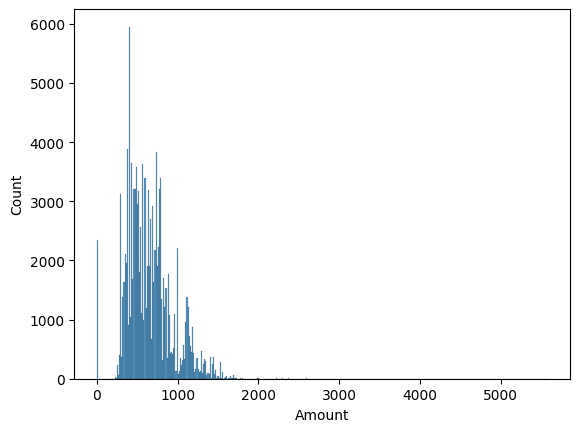

In [10]:
sns.histplot(data=df, x="Amount")

In [11]:
df.dropna(subset = ['Amount'], inplace=True)

In [12]:
df = df[~df['Amount'].isin([0])]

<Axes: xlabel='Amount'>

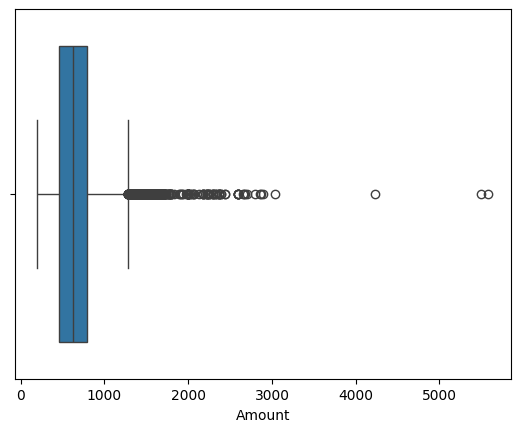

In [13]:
sns.boxplot(data=df,x="Amount")

In [14]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Amount'] = df['Amount'].clip(lower=lower_bound, upper=upper_bound)

<Axes: xlabel='Amount'>

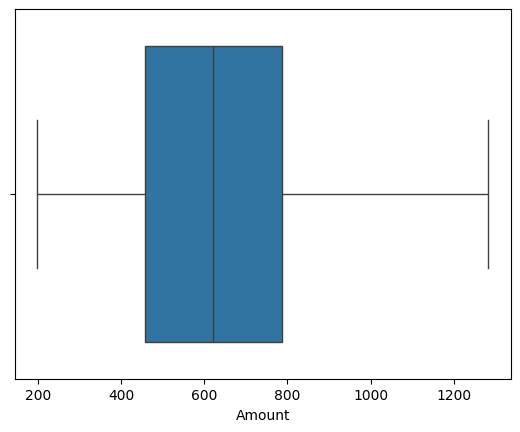

In [15]:
sns.boxplot(data=df,x="Amount")

In [16]:
df["Amount"].isnull().sum()

0

In [17]:
df.describe()

,Qty,Amount,Day,Month,Year
count,118837.000000,118837.000000,118837.000000,118837.000000,118837.0
mean,0.960467,656.718627,14.922894,4.908219,2022.0
std,0.216387,254.149699,8.737241,0.818092,0.0
min,0.000000,199.000000,1.000000,3.000000,2022.0
25%,1.000000,458.000000,7.000000,4.000000,2022.0
50%,1.000000,622.000000,15.000000,5.000000,2022.0
75%,1.000000,788.000000,22.000000,6.000000,2022.0
max,8.000000,1283.000000,31.000000,6.000000,2022.0


In [18]:
lists=["ship-city","ship-state"]
for i in lists:
    df[i]=df[i].str.lower()

In [19]:
df["ship-state"].fillna("Unknown",inplace=True)

In [20]:
df['ship-state'].unique()

array(['maharashtra', 'karnataka', 'puducherry', 'tamil nadu',
       'uttar pradesh', 'chandigarh', 'telangana', 'andhra pradesh',
       'rajasthan', 'delhi', 'haryana', 'assam', 'jharkhand',
       'chhattisgarh', 'odisha', 'kerala', 'madhya pradesh',
       'west bengal', 'nagaland', 'gujarat', 'uttarakhand', 'bihar',
       'jammu & kashmir', 'punjab', 'himachal pradesh',
       'arunachal pradesh', 'manipur', 'goa', 'meghalaya', 'tripura',
       'ladakh', 'dadra and nagar', 'sikkim', 'Unknown',
       'andaman & nicobar ', 'rajshthan', 'nl', 'mizoram', 'new delhi',
       'punjab/mohali/zirakpur', 'rj', 'orissa', 'lakshadweep', 'pb',
       'ar', 'pondicherry', 'rajsthan'], dtype=object)

In [21]:
df.loc[df['ship-state']=='ar']

,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,Day,Month,Year
51420,2022-05-30,Shipped,Amazon,Expedited,Top,L,Shipped,1,493.0,itanagar,ar,False,30,5,2022


In [22]:
df.loc[df['ship-state']=="rj",'ship-state']="rajasthan"
df.loc[df['ship-state']=="rajshthan",'ship-state']="rajasthan"
df.loc[df['ship-state']=="pb",'ship-state']="punjab"
df.loc[df['ship-state']=="punjab/mohali/zirakpur",'ship-state']="punjab"
df.loc[df['ship-state']=='ar','ship-state']="arunachal pradesh"
df.loc[df['ship-state']=='nl','ship-state']='nagaland'

In [23]:
df.head()

,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,Day,Month,Year
0,2022-04-30,Cancelled,Merchant,Standard,Set,S,NaN,0,647.62,mumbai,maharashtra,False,30,4,2022
1,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,kurta,3XL,Shipped,1,406.00,bengaluru,karnataka,False,30,4,2022
2,2022-04-30,Shipped,Amazon,Expedited,kurta,XL,Shipped,1,329.00,navi mumbai,maharashtra,True,30,4,2022
3,2022-04-30,Cancelled,Merchant,Standard,Western Dress,L,NaN,0,753.33,puducherry,puducherry,False,30,4,2022
4,2022-04-30,Shipped,Amazon,Expedited,Top,3XL,Shipped,1,574.00,chennai,tamil nadu,False,30,4,2022


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118837 entries, 0 to 128974
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                118837 non-null  datetime64[ns]
 1   Status              118837 non-null  object        
 2   Fulfilment          118837 non-null  object        
 3   ship-service-level  118837 non-null  object        
 4   Category            118837 non-null  object        
 5   Size                118837 non-null  object        
 6   Courier Status      113701 non-null  object        
 7   Qty                 118837 non-null  int64         
 8   Amount              118837 non-null  float64       
 9   ship-city           118806 non-null  object        
 10  ship-state          118837 non-null  object        
 11  B2B                 118837 non-null  bool          
 12  Day                 118837 non-null  int64         
 13  Month               118837 no

In [25]:
df_grouped=df.groupby("Size")["Amount"].mean().reset_index()

C:\Users\dkdes\AppData\Local\Temp\ipykernel_37640\3110123467.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Size', y='Amount', data=df.groupby("Size")["Amount"].mean().reset_index().sort_values(by="Amount"), palette='viridis')


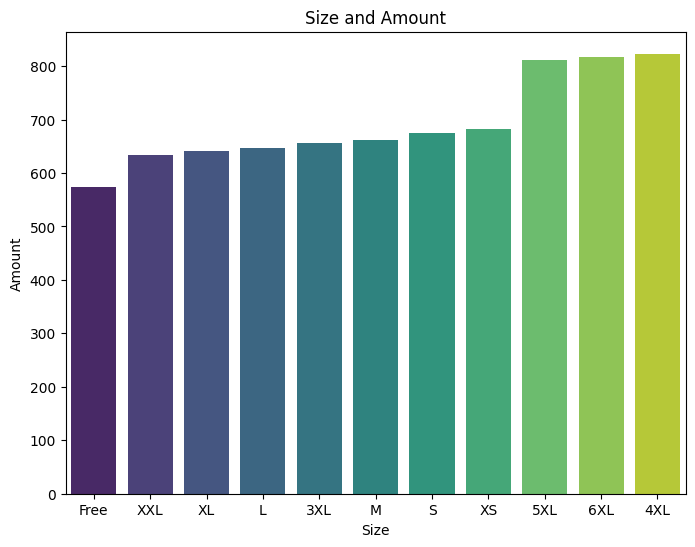

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x='Size', y='Amount', data=df.groupby("Size")["Amount"].mean().reset_index().sort_values(by="Amount"), palette='viridis')
plt.title('Size and Amount')
plt.xlabel('Size')
plt.ylabel('Amount')
plt.show()

In [27]:
df["Size"].value_counts()

M       20867
L       20320
XL      19318
XXL     16700
S       15622
3XL     13850
XS      10185
6XL       698
5XL       520
4XL       402
Free      355
Name: Size, dtype: int64

<Axes: xlabel='Size', ylabel='count'>

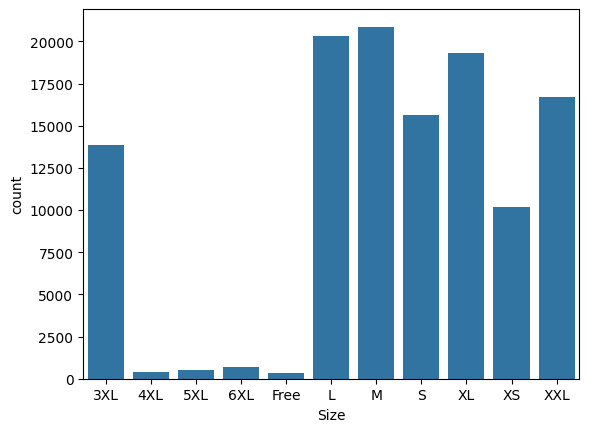

In [28]:
sns.countplot(x=df["Size"].sort_values(),data=df)

C:\Users\dkdes\AppData\Local\Temp\ipykernel_37640\1136019094.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Amount', data=df.groupby("Category")["Amount"].mean().reset_index().sort_values(by="Amount"), palette='viridis')


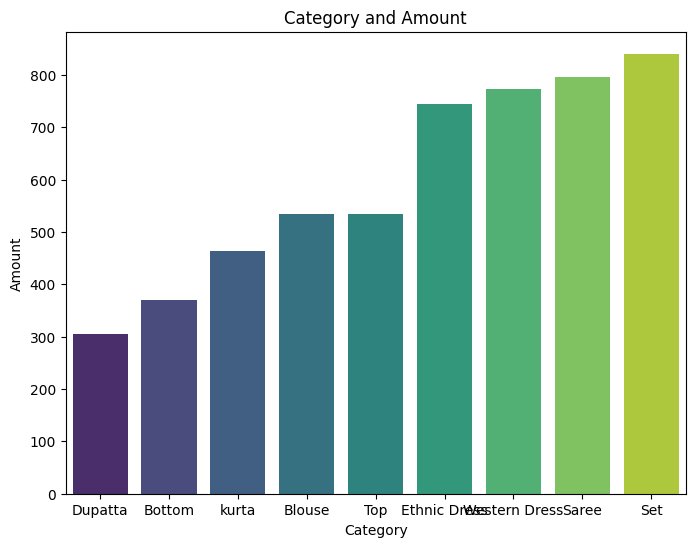

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x='Category', y='Amount', data=df.groupby("Category")["Amount"].mean().reset_index().sort_values(by="Amount"), palette='viridis')
plt.title('Category and Amount')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()

In [30]:
df["Category"].value_counts()

Set              46029
kurta            45859
Western Dress    14473
Top               9991
Ethnic Dress      1061
Blouse             859
Bottom             408
Saree              154
Dupatta              3
Name: Category, dtype: int64

In [31]:
df.groupby("Category")["Qty"].sum().sort_values()

Category
Dupatta              3
Saree              151
Bottom             385
Blouse             822
Ethnic Dress      1021
Top               9725
Western Dress    13708
kurta            44112
Set              44212
Name: Qty, dtype: int64

In [32]:
df.loc[df["Qty"]==0]

,Date,Status,Fulfilment,ship-service-level,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,Day,Month,Year
0,2022-04-30,Cancelled,Merchant,Standard,Set,S,NaN,0,647.62,mumbai,maharashtra,False,30,4,2022
3,2022-04-30,Cancelled,Merchant,Standard,Western Dress,L,NaN,0,753.33,puducherry,puducherry,False,30,4,2022
23,2022-04-30,Cancelled,Merchant,Standard,Set,M,NaN,0,570.48,pune,maharashtra,False,30,4,2022
83,2022-04-30,Cancelled,Merchant,Standard,Set,M,NaN,0,1105.36,dehradun,uttarakhand,False,30,4,2022
178,2022-04-30,Cancelled,Merchant,Standard,Top,L,NaN,0,463.81,bengaluru,karnataka,False,30,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128730,2022-06-01,Cancelled,Merchant,Standard,Western Dress,XL,NaN,0,700.00,barabanki,uttar pradesh,False,1,6,2022
128761,2022-06-01,Cancelled,Merchant,Standard,Top,S,NaN,0,519.05,bengaluru,karnataka,False,1,6,2022
128762,2022-06-01,Cancelled,Merchant,Standard,kurta,S,NaN,0,385.71,bengaluru,karnataka,False,1,6,2022
128875,2022-06-01,Cancelled,Merchant,Standard,Western Dress,XL,NaN,0,734.29,barabanki,uttar pradesh,False,1,6,2022


In [33]:
df["Courier Status"].value_counts()

Shipped      107170
Unshipped      6531
Name: Courier Status, dtype: int64

In [34]:
df["Courier Status"].isnull().sum()

5136

In [35]:
df["Courier Status"].fillna("Unknown",inplace=True)

In [36]:
df["Status"].value_counts()

Shipped                          76078
Shipped - Delivered to Buyer     28045
Cancelled                        10766
Shipped - Returned to Seller      1899
Shipped - Picked Up                945
Pending                            639
Pending - Waiting for Pick Up      272
Shipped - Returning to Seller      143
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            3
Shipped - Damaged                    1
Name: Status, dtype: int64

In [37]:
grouped=df.groupby("Status").get_group("Cancelled")["Category"].value_counts()
pd.set_option('display.max_rows', None)
print(grouped)
pd.reset_option('display.max_rows')

Set              4199
kurta            4195
Western Dress    1335
Top               829
Ethnic Dress       80
Blouse             75
Bottom             41
Saree              12
Name: Category, dtype: int64


In [38]:
df.groupby("ship-state")["Amount"].sum().sort_values(ascending=False)

ship-state
maharashtra           13248995.96
karnataka             10416992.38
telangana              6870977.87
uttar pradesh          6765736.78
tamil nadu             6476773.52
delhi                  4323229.82
kerala                 3810768.97
west bengal            3486586.19
andhra pradesh         3190704.69
haryana                2855257.99
gujarat                2710700.32
rajasthan              1737474.36
madhya pradesh         1580828.16
bihar                  1398562.39
odisha                 1369066.57
punjab                 1198739.09
assam                  1012322.20
uttarakhand             968038.30
jharkhand               912003.50
goa                     635479.92
chhattisgarh            566280.83
himachal pradesh        500435.51
jammu & kashmir         452765.74
manipur                 212162.99
chandigarh              210062.67
puducherry              191576.24
andaman & nicobar       157931.62
sikkim                  140168.66
nagaland                139072.67
meg

In [39]:
grouped=df.groupby("ship-city")["Amount"].sum().sort_values(ascending=False)
print(grouped)


ship-city
bengaluru        7215301.13
hyderabad        5563818.53
mumbai           4267349.34
new delhi        3931526.56
chennai          3587246.60
                    ...    
byatryanpura         259.00
andul, howrah        259.00
naduvannur           248.00
kilapavoor           241.00
itagi                236.19
Name: Amount, Length: 7094, dtype: float64


In [40]:
def plotgraph(Group_name):
    grouped=df.groupby("Category").get_group(Group_name)["ship-state"].value_counts()
    grouped_df = grouped.reset_index()
    grouped_df.columns = ["ship-state", "count"]  # Rename columns for clarity

# Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x="ship-state", y="count", data=grouped_df, palette="viridis")
    plt.xticks(rotation=90)  # Rotate state names for readability
    plt.xlabel("Ship State")
    plt.ylabel("Count")
    plt.title("Shipment Count for"+ Group_name + "by state")
    plt.show()

C:\Users\dkdes\AppData\Local\Temp\ipykernel_37640\2276112393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ship-state", y="count", data=grouped_df, palette="viridis")


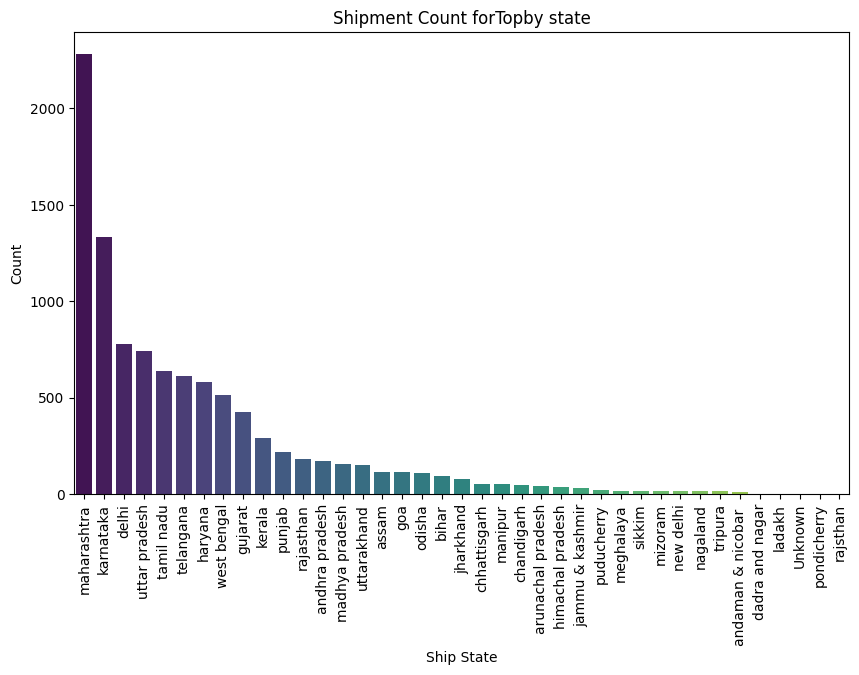

In [41]:
plotgraph("Top")

C:\Users\dkdes\AppData\Local\Temp\ipykernel_37640\2276112393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ship-state", y="count", data=grouped_df, palette="viridis")


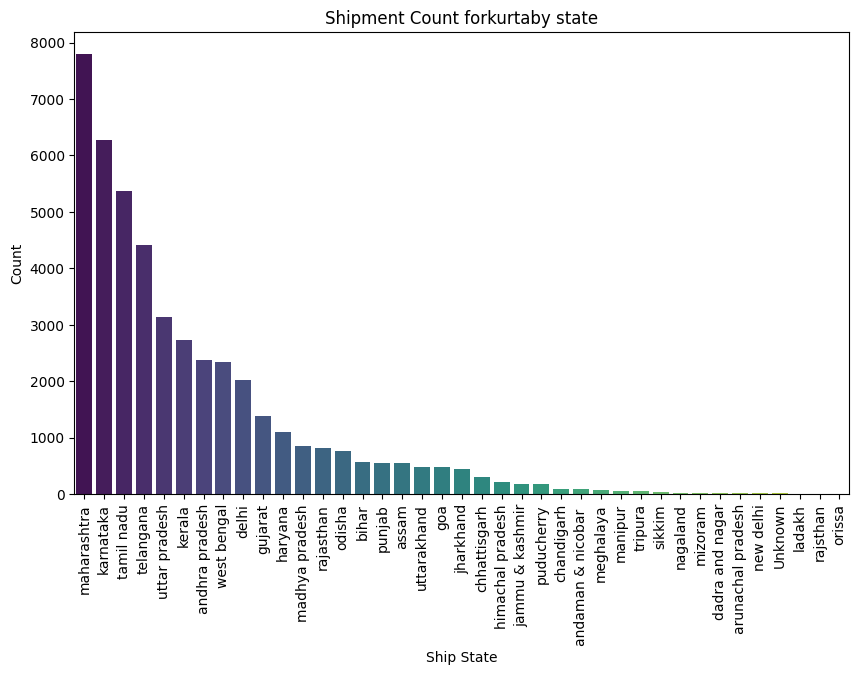

In [42]:
plotgraph("kurta")

C:\Users\dkdes\AppData\Local\Temp\ipykernel_37640\2276112393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ship-state", y="count", data=grouped_df, palette="viridis")


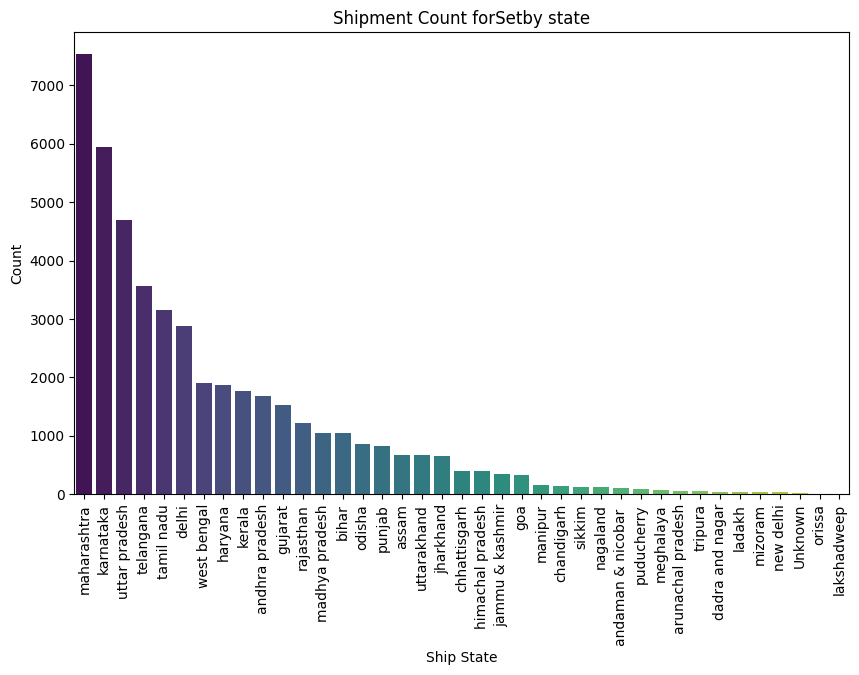

In [43]:
plotgraph("Set")

C:\Users\dkdes\AppData\Local\Temp\ipykernel_37640\2276112393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ship-state", y="count", data=grouped_df, palette="viridis")


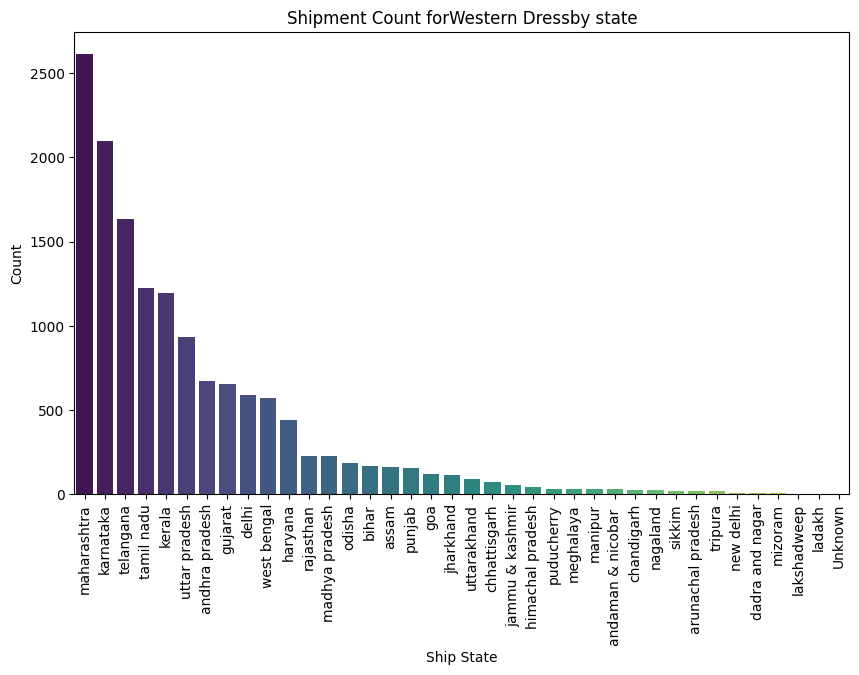

In [44]:
plotgraph("Western Dress")

C:\Users\dkdes\AppData\Local\Temp\ipykernel_37640\2276112393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ship-state", y="count", data=grouped_df, palette="viridis")


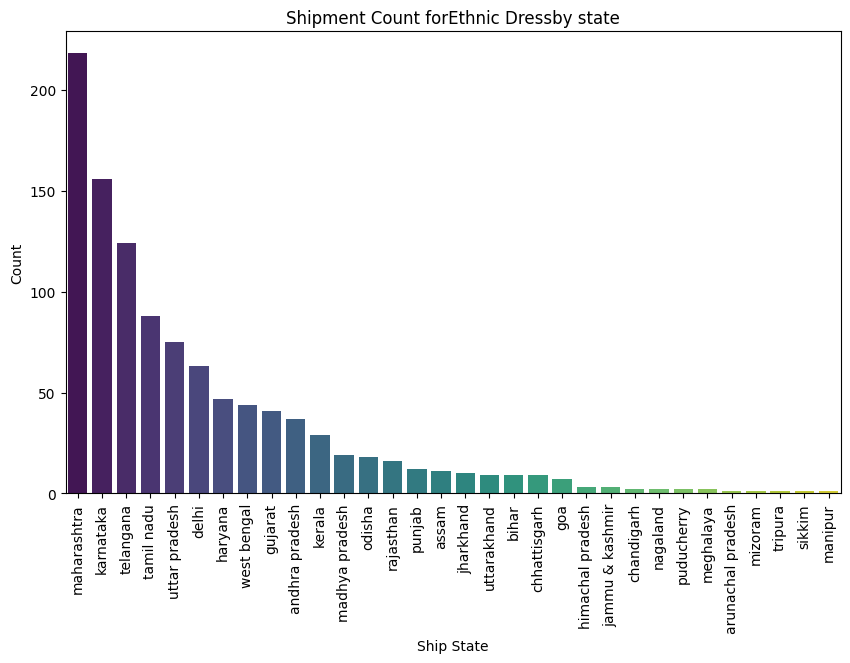

In [45]:
plotgraph("Ethnic Dress")

C:\Users\dkdes\AppData\Local\Temp\ipykernel_37640\2276112393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ship-state", y="count", data=grouped_df, palette="viridis")


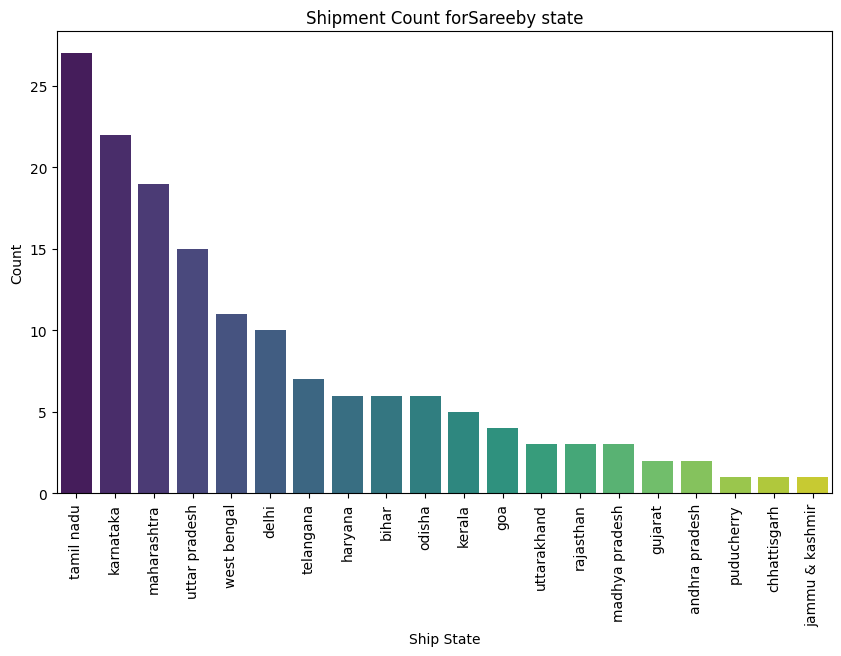

In [46]:
plotgraph("Saree")

C:\Users\dkdes\AppData\Local\Temp\ipykernel_37640\2276112393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ship-state", y="count", data=grouped_df, palette="viridis")


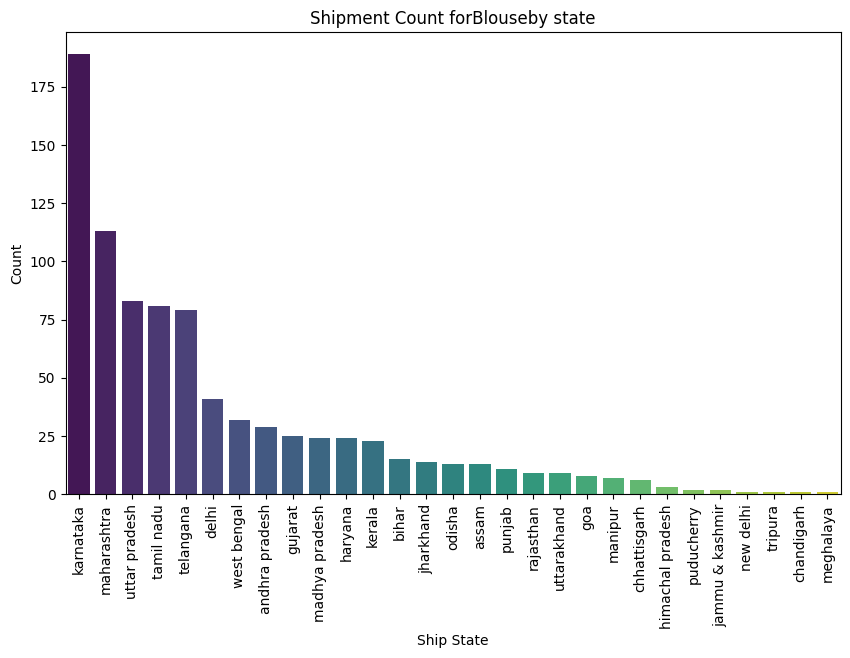

In [47]:
plotgraph("Blouse")

C:\Users\dkdes\AppData\Local\Temp\ipykernel_37640\2276112393.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ship-state", y="count", data=grouped_df, palette="viridis")


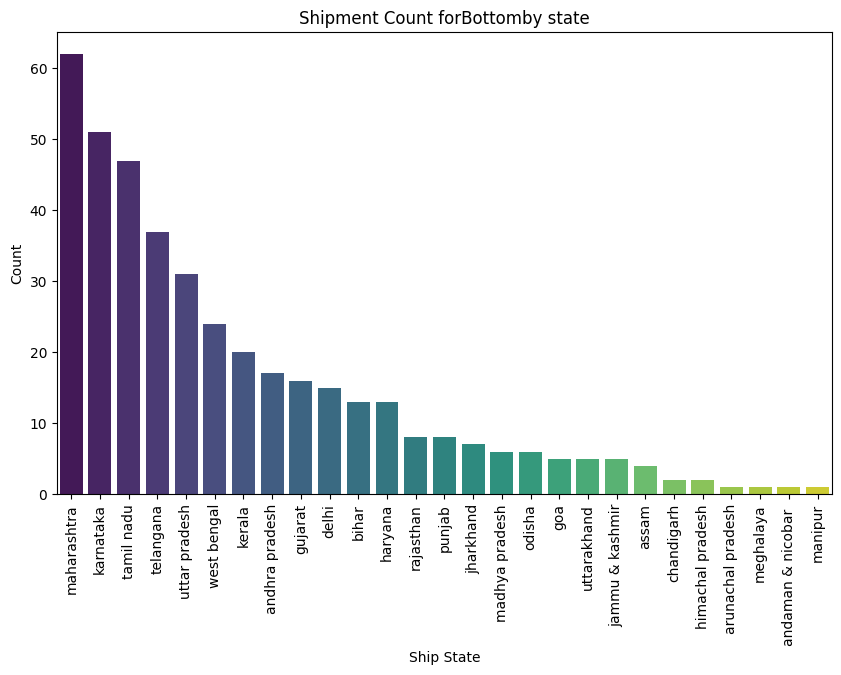

In [48]:
plotgraph("Bottom")

In [49]:
df.columns


Index(['Date', 'Status', 'Fulfilment', 'ship-service-level', 'Category',
       'Size', 'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'B2B', 'Day', 'Month', 'Year'],
      dtype='object')

## Hypothesis Testing
If

In [50]:
import pandas as pd
from scipy.stats import f_oneway

# Sample DataFrame

# Select top 3-5 states with the most data for demonstration
top_states = df['ship-state'].value_counts().nlargest(5).index
df_filtered = df[df['ship-state'].isin(top_states)]

# Group data by state
grouped_data = [group['Amount'].values for name, group in df_filtered.groupby('ship-state')]

# Perform ANOVA test
f_stat, p_value = f_oneway(*grouped_data)

print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: Sales amount differs between states.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales amount.")


F-Statistic: 162.88266393515178
P-Value: 5.132467111224444e-139
Reject the null hypothesis: Sales amount differs between states.


In [51]:
import pandas as pd
from scipy.stats import ttest_ind


# Filter two courier statuses
df_filtered = df[df['Courier Status'].isin(['Shipped', 'Unshipped'])][['Courier Status', 'Amount']].dropna()

# Create two groups
shipped = df_filtered[df_filtered['Courier Status'] == 'Shipped']['Amount']
unshipped = df_filtered[df_filtered['Courier Status'] == 'Unshipped']['Amount']

# Perform Welch’s t-test
t_stat, p_value = ttest_ind(shipped, unshipped, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("✅ Significant: Courier status affects sales amount.")
else:
    print("❌ Not Significant: No meaningful difference in sales.")


T-Statistic: -0.5632380264982079
P-Value: 0.5732900289374783
❌ Not Significant: No meaningful difference in sales.


## Do shipped and unshipped orders have significantly different average sales amounts?

In [52]:
from scipy.stats import ttest_ind

# Filter only shipped and unshipped
df_filtered = df[df['Courier Status'].isin(['Shipped', 'Unshipped'])]

# Drop missing values and extract amounts
shipped_amounts = df_filtered[df_filtered['Courier Status'] == 'Shipped']['Amount'].dropna()
unshipped_amounts = df_filtered[df_filtered['Courier Status'] == 'Unshipped']['Amount'].dropna()

# Perform independent two-sample t-test
t_stat, p_value = ttest_ind(shipped_amounts, unshipped_amounts, equal_var=False)  # Welch's t-test

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("✅ Significant difference in sales amount between shipped and unshipped.")
else:
    print("❌ No significant difference.")


T-Statistic: -0.5632380264982079
P-Value: 0.5732900289374783
❌ No significant difference.


## If there is a significant difference in sales amount between B2B and B2C 

In [53]:
from scipy.stats import ttest_ind

# Check the unique values in the B2B column (e.g., "Yes"/"No" or 1/0)
print(df['B2B'].unique())

# Assuming B2B = 1 for B2B, and 0 for B2C (adjust if necessary)
b2b_amounts = df[df['B2B'] == 1]['Amount'].dropna()
b2c_amounts = df[df['B2B'] == 0]['Amount'].dropna()

# Perform two-sample independent t-test (Welch’s t-test if variances differ)
t_stat, p_value = ttest_ind(b2b_amounts, b2c_amounts, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
if p_value < 0.05:
    print("✅ Significant difference in sales amount between B2B and B2C.")
else:
    print("❌ No significant difference in sales amount between B2B and B2C.")


[False  True]
T-Statistic: 3.358059848684576
P-Value: 0.0008196762238684588
✅ Significant difference in sales amount between B2B and B2C.


## Unpacking Amazon Sales: Key Insights from April–June 2022

This analysis explores a dataset containing 128,975 entries from an Amazon sales report. The original dataset includes 24 columns covering:

Order ID

Date

Status

Fulfilment

Sales Channel

Style

SKU

Category

Size

Amount

Various shipping details

The analysis focuses on sales between April and June 2022, derived from the processing of the Date column.

🧹 Data Cleaning
The following cleaning steps were performed:

Dropped less relevant columns:
'index', 'Order ID', 'Sales Channel', 'Style', 'SKU', 'ASIN', 'currency', 'ship-postal-code', 'ship-country', 'promotion-ids', 'Unnamed: 22', 'fulfilled-by'

Handled missing and zero amounts:

Dropped rows with missing Amount values (7795 entries).

Filtered out rows where Amount == 0.

Standardized shipping fields:

Converted ship-city and ship-state to lowercase.

Filled missing values in ship-state with "Unknown".

➡️ Final dataset: 118,837 entries, 15 columns

💰 Sales Summary Statistics
Metric	Value
Mean	₹656.72
Median	₹622.00
Minimum	₹199.00
Maximum	₹1283.00

🔑 Key Sales Dimensions
Fulfilment: 'Merchant' or 'Amazon'

Sales Channel: Mostly Amazon.in

Shipping Services: 'Standard', 'Expedited'

Order Statuses:

Major: Shipped, Unshipped, Cancelled

Others: Delivered to Buyer, Returned to Seller, Picked Up, Pending, Waiting for Pick Up, etc.

Courier Status:

'Shipped', 'Unshipped', and Unknown (6872 originally missing, now filled)

Customer Type: Distinction between B2B and B2C using a boolean flag

📦 Product Performance
📈 Top Categories by Volume
Category	Units Sold
Set	46,029
Kurta	45,859
Western Dress	14,473
Top	9,991
Ethnic Dress	1,061

📏 Top Sizes by Volume
Size	Orders
M	20,867
L	20,320
XL	19,318
XXL	16,700

💸 Sales Amount by Category and Size
Bar plots were generated to visualize average sales amount across categories and sizes. Although exact values are not listed, the analysis reveals price variations across these dimensions.

❌ Cancelled Orders Analysis
Total Cancelled Orders: 10,766

Cancelled Orders with Qty = 0: 5136

Category-wise breakdown (where Qty = 0 and Status = Cancelled):

Category	Count
Set	5136
Western Dress	5136
Kurta	5136
Top	829
Ethnic Dress	80
Blouse	75
Bottom	41
Saree	12

This suggests that some product categories have a higher tendency of being cancelled before dispatch.

🗺️ Geographical Sales Footprint
🌍 Sales by State (Total Amount in INR)
State	Total Sales
Maharashtra	13,248,995.96
Karnataka	10,416,992.38
Telangana	6,870,977.87
Uttar Pradesh	6,765,736.78
Tamil Nadu	6,476,773.52

➡️ ANOVA test was applied to these states.
Result: Not statistically significant — no meaningful difference in average sales amounts across these top 5 states.

🏙️ Sales by City (Total Amount in INR)
City	Total Sales
Bengaluru	7,215,301.13
Hyderabad	5,563,818.53
Mumbai	4,267,349.34
New Delhi	3,931,526.56
Chennai	3,587,246.60

Other cities also contribute significantly in descending order.

🚚 Shipment Distribution by State per Category
The analysis included distribution of shipments across states for categories like:

Top

Set

Western Dress

Ethnic Dress

Saree

Blouse

Bottom

This reveals key markets for specific product types.

🧪 Hypothesis Testing
1. Shipped vs. Unshipped Orders
Test: Independent t-test on sales amount

P-value: 0.573
➡️ Conclusion: No significant difference in average sales amount between Shipped and Unshipped orders.

2. B2B vs. B2C Orders
Test: Independent t-test on sales amount

P-value: < 0.05
➡️ Conclusion: Statistically significant difference in sales amount between B2B and B2C orders.
🔍 (The direction of the difference is not explicitly mentioned, but the result is significant.)

🧾 Summary
Majority of sales fall between ₹600–₹1300.

Top-selling categories: Set, Kurta, Western Dress

Maharashtra, Karnataka, and Telangana are top states by revenue.

Bengaluru and Hyderabad lead among cities.

B2B and B2C customers show significant differences in spending behavior.

Cancelled orders are concentrated in a few categories and occur often at Qty = 0.